In [1]:
#dT2020raw.SUBZONE_N.unique()

In [2]:
#dT20192011 = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Total)')

In [3]:
#dT20192011

In [4]:
#pd.DataFrame(dT20192011.Subzone.unique()) - pd.DataFrame(dT2020raw.SUBZONE_N.unique())

## ================================ PT. 1 ================================
#  >>>>>>>>>>>>>>>>>>>>> DATA WRANGLING <<<<<<<<<<<<<<<<<<<<<
## =====================================================================

# Obtaining BusStop and MRTStop information
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Using Geopandas to Import BusStops

In [5]:
import geopandas as gpd
import pandas as pd
import seaborn as sb

In [6]:
#Load into GeoDataFrame
gdf_BusStop = gpd.read_file('BusStop.shp')

In [7]:
gdf_BusStop.head()

,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry
0,78221,B06,BLK 231A CP,POINT (42227.955 39563.156)
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458)
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741)
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180)
4,55231,B02,OPP SBST ANG MO KIO DEPOT,POINT (29669.934 40841.514)


<AxesSubplot:>

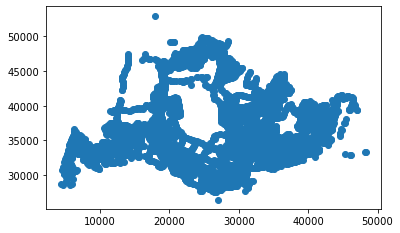

In [8]:
gdf_BusStop.plot()

### Using Geopandas to Import Subzone

In [9]:
#Load into GeoDataFrame
gdf_Subzone = gpd.read_file('MP14_SUBZONE_WEB_PL.shp')

In [10]:
gdf_Subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


### Left join BusStops with Subzone

In [11]:
from geopandas.tools import sjoin
join_left_df_BusStop = sjoin(gdf_BusStop, gdf_Subzone, how="left")
join_left_df_BusStop

,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry,index_right,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,78221,B06,BLK 231A CP,POINT (42227.955 39563.156),245.0,246.0,5.0,PASIR RIS DRIVE,PRSZ05,N,PASIR RIS,PR,EAST REGION,ER,2B73597AF3F174F3,2014-12-05,42032.4580,38988.2187,5311.060366,1.639669e+06
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458),207.0,208.0,4.0,HOUGANG WEST,HGSZ04,N,HOUGANG,HG,NORTH-EAST REGION,NER,27B0E0BDE3579753,2014-12-05,33849.2205,39506.8724,6424.482139,1.328876e+06
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741),208.0,209.0,3.0,PAYA LEBAR WEST,PLSZ03,N,PAYA LEBAR,PL,EAST REGION,ER,4BADA58E2612A6E2,2014-12-05,36649.3106,39403.4873,5898.475695,6.098947e+05
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180),166.0,167.0,5.0,FRANKEL,BDSZ05,N,BEDOK,BD,EAST REGION,ER,B34F041CC4B050EC,2014-12-05,37694.5519,33007.2679,8750.386291,4.297141e+06
4,55231,B02,OPP SBST ANG MO KIO DEPOT,POINT (29669.934 40841.514),227.0,228.0,10.0,YIO CHU KANG,AMSZ10,N,ANG MO KIO,AM,NORTH-EAST REGION,NER,5E2B16BB381BAEA4,2014-12-05,29443.7447,40836.0207,4533.218364,9.094186e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,24539,B03,DUNDEE MARINE,POINT (8211.954 31924.108),78.0,79.0,5.0,PIONEER SECTOR,PNSZ05,N,PIONEER,PN,WEST REGION,WR,F3241D6C0FEF13ED,2014-12-05,8872.7501,31423.4434,8489.982578,2.796007e+06
5133,46441,B02,BLK 816,POINT (23143.267 47097.652),305.0,306.0,2.0,MIDVIEW,WDSZ02,N,WOODLANDS,WD,NORTH REGION,NR,42D5F52D334C615F,2014-12-05,23349.7600,46841.1143,4159.201440,9.364155e+05
5134,64391,B04,BLK 831,POINT (34273.668 39267.502),242.0,243.0,1.0,HOUGANG CENTRAL,HGSZ01,N,HOUGANG,HG,NORTH-EAST REGION,NER,C4419A9A8D05E0DF,2014-12-05,34470.7005,39076.5963,2759.815466,4.417334e+05
5135,10389,B01,BLK 48,POINT (27156.674 30126.309),6.0,7.0,9.0,BUKIT HO SWEE,BMSZ09,N,BUKIT MERAH,BM,CENTRAL REGION,CR,7839A8577144EFE2,2014-12-05,27680.0627,30230.8610,3275.312488,5.517320e+05


### Filter out relevant rows for BusStop_Subzone

In [12]:
BusStop_Subzone = join_left_df_BusStop.filter(['BUS_STOP_N','SUBZONE_N','PLN_AREA_N', 'REGION_N'], axis=1)
BusStop_Subzone

,BUS_STOP_N,SUBZONE_N,PLN_AREA_N,REGION_N
0,78221,PASIR RIS DRIVE,PASIR RIS,EAST REGION
1,63359,HOUGANG WEST,HOUGANG,NORTH-EAST REGION
2,64141,PAYA LEBAR WEST,PAYA LEBAR,EAST REGION
3,83139,FRANKEL,BEDOK,EAST REGION
4,55231,YIO CHU KANG,ANG MO KIO,NORTH-EAST REGION
...,...,...,...,...
5132,24539,PIONEER SECTOR,PIONEER,WEST REGION
5133,46441,MIDVIEW,WOODLANDS,NORTH REGION
5134,64391,HOUGANG CENTRAL,HOUGANG,NORTH-EAST REGION
5135,10389,BUKIT HO SWEE,BUKIT MERAH,CENTRAL REGION


In [13]:
#BusStop_Subzone_count = BusStop_Subzone.groupby('SUBZONE_N').count()
#BusStop_Subzone_count = BusStop_Subzone_count.filter(['SUBZONE_N', 'BUS_STOP_N'], axis=1)
#BusStop_Subzone_count

### Using Geopandas to Import MRT Stops

In [14]:
#Load into GeoDataFrame
gdf_MRTStop = gpd.read_file('MRTLRTStnPtt.shp')

In [15]:
gdf_MRTStop.head()

,OBJECTID,STN_NAME,STN_NO,geometry
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078)
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302)
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568)
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548)
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820)


<AxesSubplot:>

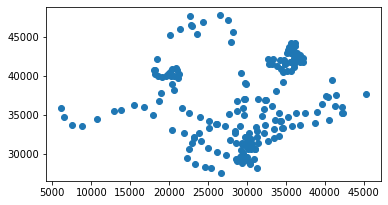

In [16]:
gdf_MRTStop.plot()

### Left join MRTStops with Subzone

In [17]:
from geopandas.tools import sjoin
join_left_df_MRTStop = sjoin(gdf_MRTStop, gdf_Subzone, how="left")
join_left_df_MRTStop
# Note the NaNs where the point did not intersect a boro

,OBJECTID_left,STN_NAME,STN_NO,geometry,index_right,OBJECTID_right,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078),169,170,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,58687154BD252A0A,2014-12-05,35237.1681,33246.0587,7028.340071,2.579087e+06
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302),146,147,4,LAKESIDE,JESZ04,N,JURONG EAST,JE,WEST REGION,WR,3BBFD45071B70ECF,2014-12-05,16697.0118,35114.9062,8828.633830,3.108023e+06
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568),316,317,8,KHATIB,YSSZ08,N,YISHUN,YS,NORTH REGION,NR,DC75517DA31123DB,2014-12-05,27480.6357,44420.6884,4956.145735,1.432913e+06
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548),280,281,2,TURF CLUB,SKSZ02,N,SUNGEI KADUT,SK,NORTH REGION,NR,17459E60C3EEAF30,2014-12-05,20234.6006,44507.1901,7665.676019,3.291406e+06
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820),4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,189,TELOK BLANGAH MRT STATION,CC28,POINT (25376.847 28138.967),23,24,1,MARITIME SQUARE,BMSZ01,N,BUKIT MERAH,BM,CENTRAL REGION,CR,C1AC31ABF9978DDB,2014-12-05,25805.7867,27911.4193,13737.116181,2.701634e+06
181,190,TELOK AYER MRT STATION,DT18,POINT (29667.622 29414.587),35,36,3,CHINATOWN,OTSZ03,Y,OUTRAM,OT,CENTRAL REGION,CR,0FF1661344C84AED,2014-12-05,29153.9676,29158.0443,4297.599910,5.872227e+05
182,191,NEWTON MRT STATION,NS21,POINT (28519.362 32735.207),120,121,3,NEWTON CIRCUS,NTSZ03,Y,NEWTON,NT,CENTRAL REGION,CR,8B2F19EEE51EDA60,2014-12-05,28587.1626,32653.9428,2399.407300,2.135816e+05
183,0,CANBERRA MRT STATION,NS12,POINT (27598.622 47200.242),307,308,2,SEMBAWANG SPRINGS,SBSZ02,N,SEMBAWANG,SB,NORTH REGION,NR,C739B507A1ACBDB3,2014-12-05,27076.8118,46959.0886,4212.042247,1.099395e+06


### Filter out relevant rows for MRTStop_Subzone

In [18]:
MRTStop_Subzone = join_left_df_MRTStop.filter(['STN_NAME', 'STN_NO', 'SUBZONE_N', 'PLN_AREA_N', 'REGION_N'], axis=1)
MRTStop_Subzone

,STN_NAME,STN_NO,SUBZONE_N,PLN_AREA_N,REGION_N
0,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION
1,CHINESE GARDEN MRT STATION,EW25,LAKESIDE,JURONG EAST,WEST REGION
2,KHATIB MRT STATION,NS14,KHATIB,YISHUN,NORTH REGION
3,KRANJI MRT STATION,NS7,TURF CLUB,SUNGEI KADUT,NORTH REGION
4,REDHILL MRT STATION,EW18,REDHILL,BUKIT MERAH,CENTRAL REGION
...,...,...,...,...,...
180,TELOK BLANGAH MRT STATION,CC28,MARITIME SQUARE,BUKIT MERAH,CENTRAL REGION
181,TELOK AYER MRT STATION,DT18,CHINATOWN,OUTRAM,CENTRAL REGION
182,NEWTON MRT STATION,NS21,NEWTON CIRCUS,NEWTON,CENTRAL REGION
183,CANBERRA MRT STATION,NS12,SEMBAWANG SPRINGS,SEMBAWANG,NORTH REGION


### EXAMPLE: MRT Stops by tap-in tap-out volume

In [19]:
MRTStop_TITO = pd.read_csv('2.8_transport_node_train_202101.csv')    
sum_column = MRTStop_TITO["TOTAL_TAP_IN_VOLUME"] + MRTStop_TITO["TOTAL_TAP_OUT_VOLUME"]
MRTStop_TITO["TOTAL_TAP_VOLUME"] = sum_column
MRTStop_TITO = MRTStop_TITO.filter(['PT_CODE', 'TOTAL_TAP_VOLUME'], axis=1)
MRTStop_TITO = MRTStop_TITO.groupby('PT_CODE')['TOTAL_TAP_VOLUME'].sum()
MRTStop_TITO

PT_CODE
BP10    183991
BP11    165351
BP12    126103
BP13     65108
BP2     151841
         ...  
SW6     171376
SW7     127504
SW8     101888
TE1      98724
TE3     141889
Name: TOTAL_TAP_VOLUME, Length: 159, dtype: int64

### EXAMPLE: Merge MRT Stops by tap-in tap-out volume with MRTStop_Subzone

In [20]:
testing = pd.merge(MRTStop_Subzone, MRTStop_TITO, how='inner', left_on = 'STN_NO', right_on = 'PT_CODE', validate='many_to_many')
testing.head(10)

,STN_NAME,STN_NO,SUBZONE_N,PLN_AREA_N,REGION_N,TOTAL_TAP_VOLUME
0,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,642053
1,CHINESE GARDEN MRT STATION,EW25,LAKESIDE,JURONG EAST,WEST REGION,406676
2,KHATIB MRT STATION,NS14,KHATIB,YISHUN,NORTH REGION,1448844
3,KRANJI MRT STATION,NS7,TURF CLUB,SUNGEI KADUT,NORTH REGION,262221
4,REDHILL MRT STATION,EW18,REDHILL,BUKIT MERAH,CENTRAL REGION,766934
5,YEW TEE MRT STATION,NS5,YEW TEE,CHOA CHU KANG,WEST REGION,1410006
6,PIONEER MRT STATION,EW28,JURONG WEST CENTRAL,JURONG WEST,WEST REGION,1190585
7,COMMONWEALTH MRT STATION,EW20,COMMONWEALTH,QUEENSTOWN,CENTRAL REGION,640451
8,SIMEI MRT STATION,EW3,SIMEI,TAMPINES,EAST REGION,769284
9,ADMIRALTY MRT STATION,NS10,WOODLANDS EAST,WOODLANDS,NORTH REGION,2150081


### EXAMPLE: Number of MRT Stops by Subzone

In [21]:
MRTStop_Subzone_count = testing.groupby('SUBZONE_N').count()
MRTStop_Subzone_count = MRTStop_Subzone_count.rename(columns={'STN_NAME': 'STN_NUM'})
MRTStop_Subzone_count = MRTStop_Subzone_count.filter(['SUBZONE_N', 'STN_NUM'], axis=1)
MRTStop_Subzone_count

,STN_NUM
SUBZONE_N,
ALJUNIED,3
ANAK BUKIT,1
ANCHORVALE,3
BANGKIT,2
BEDOK NORTH,1
...,...
WOODLANDS SOUTH,1
WOODLANDS WEST,1
YEW TEE,1


### EXAMPLE: Filter 'testing' and groupby SUBZONE

In [22]:
MRTStop_testing = testing.filter(['SUBZONE_N', 'TOTAL_TAP_VOLUME', 'STN_NUM'], axis=1)
MRTStop_testing = MRTStop_testing.groupby('SUBZONE_N')['TOTAL_TAP_VOLUME'].sum()
MRTStop_testing

SUBZONE_N
ALJUNIED           1489384
ANAK BUKIT          538115
ANCHORVALE          364099
BANGKIT             232430
BEDOK NORTH        1460136
                    ...   
WOODLANDS SOUTH     141889
WOODLANDS WEST     1005198
YEW TEE            1410006
YIO CHU KANG       1043477
YISHUN WEST        2484007
Name: TOTAL_TAP_VOLUME, Length: 102, dtype: int64

### EXAMPLE: Merge MRTStop_testing and MRTStop_Subzone_count datasets

In [23]:
MRTStop_testing = pd.merge(MRTStop_testing, MRTStop_Subzone_count, how='inner', on = 'SUBZONE_N', validate='many_to_many')
MRTStop_testing

,TOTAL_TAP_VOLUME,STN_NUM
SUBZONE_N,,
ALJUNIED,1489384,3
ANAK BUKIT,538115,1
ANCHORVALE,364099,3
BANGKIT,232430,2
BEDOK NORTH,1460136,1
...,...,...
WOODLANDS SOUTH,141889,1
WOODLANDS WEST,1005198,1
YEW TEE,1410006,1


# Subzone Demographics Data for 2011-2019 and 2020
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Extracting Base Datasets

#### Filter population by subzone, age group and type of dwelling from sheets and find list of subzones

### 2020

In [24]:
dT2020raw = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Total)'); x = 69840
dT2020raw = dT2020raw.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw['SUBZONE_N'] = dT2020raw['SUBZONE_N'].str.upper()
dT2020raw = dT2020raw[:x]
dT2020raw = dT2020raw[dT2020raw['SUBZONE_N'] != 'TOTAL']
dT2020raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2020'], axis=1)
dT2020raw

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
listOfSubzones = dT2020raw.SUBZONE_N.unique()

### 2011-2019

In [ ]:
dT201119raw = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Total)'); y = 68219
dT201119raw = dT201119raw.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw['SUBZONE_N'] = dT201119raw['SUBZONE_N'].str.upper()
dT201119raw = dT201119raw[:y]
dT201119raw = dT201119raw[dT201119raw['SUBZONE_N'] != 'TOTAL']
dT201119raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw

In [ ]:
listOfSubzones1119 = dT201119raw.SUBZONE_N.unique()

### Extracting Gender

#### Filter male and female population by subzone from sheets and then derive percentage of population that are male by dividing male population by total population

#### NEW: - .MultiIndex = allows for hierarchical indexing - .replace() = replace values in columns with another value  - .insert() = insert value/column to a specified index

### 2020

In [ ]:
dT2020raw_male = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Male)'); x = 69840
dT2020raw_male = dT2020raw_male.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw_male['SUBZONE_N'] = dT2020raw_male['SUBZONE_N'].str.upper()
dT2020raw_male = dT2020raw_male[:x]
dT2020raw_male = dT2020raw_male[dT2020raw_male['SUBZONE_N'] != 'TOTAL']
dT2020raw_male = dT2020raw_male[dT2020raw_male['Age Group'] == 'Total']
dT2020raw_male = dT2020raw_male[dT2020raw_male['Type of Dwelling'] == 'Total']
dT2020raw_male = dT2020raw_male.filter(['SUBZONE_N', '2020'], axis=1)
dT2020raw_male['2020'] = dT2020raw_male['2020'].replace({'-': 0}).astype(int) #Replace '-' with '0'
dT2020raw_male

In [ ]:
dT2020raw_female = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Female)'); x = 69840
dT2020raw_female = dT2020raw_female.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw_female['SUBZONE_N'] = dT2020raw_female['SUBZONE_N'].str.upper()
dT2020raw_female = dT2020raw_female[:x]
dT2020raw_female = dT2020raw_female[dT2020raw_female['SUBZONE_N'] != 'TOTAL']
dT2020raw_female = dT2020raw_female[dT2020raw_female['Age Group'] == 'Total']
dT2020raw_female = dT2020raw_female[dT2020raw_female['Type of Dwelling'] == 'Total']
dT2020raw_female = dT2020raw_female.filter(['SUBZONE_N', '2020'], axis=1)
dT2020raw_female['2020'] = dT2020raw_female['2020'].replace({'-': 0}).astype(int) #Replace '-' with '0'
dT2020raw_female

In [ ]:
#Male percentage (2020)
dT2020_male_perc = pd.DataFrame(dT2020raw_male['2020'] + dT2020raw_female['2020'])
dT2020_male_perc = pd.DataFrame(dT2020raw_male['2020']/dT2020_male_perc['2020'])
dT2020_male_perc.rename(columns={'2020': 'Male Percentage'}, inplace=True)
dT2020_male_perc.columns = pd.MultiIndex.from_tuples(
        zip(['2020'], 
            dT2020_male_perc.columns))
dT2020_male_perc.insert(0, "SUBZONE_N", listOfSubzones, True)
dT2020_male_perc

### 2011-2019

In [ ]:
dT201119raw_male = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Male)'); y = 68219
dT201119raw_male = dT201119raw_male.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw_male['SUBZONE_N'] = dT201119raw_male['SUBZONE_N'].str.upper()
dT201119raw_male = dT201119raw_male[:y]
dT201119raw_male = dT201119raw_male[dT201119raw_male['SUBZONE_N'] != 'TOTAL']
dT201119raw_male = dT201119raw_male[dT201119raw_male['Age Group'] == 'Total']
dT201119raw_male = dT201119raw_male[dT201119raw_male['Type of Dwelling'] == 'Total']
dT201119raw_male = dT201119raw_male.filter(['SUBZONE_N', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
for i in range(9):
    dT201119raw_male[str(2011+i)] = dT201119raw_male[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_male

In [ ]:
dT201119raw_female = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Female)'); y = 68219
dT201119raw_female = dT201119raw_female.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw_female['SUBZONE_N'] = dT201119raw_female['SUBZONE_N'].str.upper()
dT201119raw_female = dT201119raw_female[:y]
dT201119raw_female = dT201119raw_female[dT201119raw_female['SUBZONE_N'] != 'TOTAL']
dT201119raw_female = dT201119raw_female[dT201119raw_female['Age Group'] == 'Total']
dT201119raw_female = dT201119raw_female[dT201119raw_female['Type of Dwelling'] == 'Total']
dT201119raw_female = dT201119raw_female.filter(['SUBZONE_N', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
for i in range(9):
    dT201119raw_female[str(2011+i)] = dT201119raw_female[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_female

In [ ]:
#Male percentage (2011-2019)
dT201119_male_perc = pd.DataFrame(listOfSubzones1119, columns = ['SUBZONE_N'])
for i in range(9):
    totalMF = pd.DataFrame(dT201119raw_male[str(2011+i)] + dT201119raw_female[str(2011+i)])
    percMF = list(dT201119raw_male[str(2011+i)]/totalMF[str(2011+i)])
    dT201119_male_perc.insert(1, str(2011+i), percMF, True)
dT201119_male_perc = dT201119_male_perc.filter(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'])
dT201119_male_perc = dT201119_male_perc.rename(columns={'2019': 'Male Percentage', '2018': 'Male Percentage', '2017': 'Male Percentage', '2016': 'Male Percentage', '2015': 'Male Percentage', '2014': 'Male Percentage', '2013': 'Male Percentage', '2012': 'Male Percentage', '2011': 'Male Percentage'})
dT201119_male_perc.columns = pd.MultiIndex.from_tuples(
        zip(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'], 
            dT201119_male_perc.columns))
dT201119_male_perc.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119_male_perc

### Extracting Age Groups

#### Filter population by subzone and age group and pivot the data frame, then group population into 4 age groups

#### NEW - .MultiIndex = allows for hierarchical indexing - .replace() = replace values in columns with another value - .pivot() = reshape dataframe by column/index values  - .insert() = insert value/column to a specified index - . merge() = merge/join datasets

### 2020


In [ ]:
dT2020raw_age = dT2020raw[dT2020raw['Type of Dwelling'] == 'Total']
dT2020raw_age = dT2020raw_age.filter(['SUBZONE_N', 'Age Group', '2020'], axis=1)
dT2020raw_age = dT2020raw_age[dT2020raw_age['Age Group'] != 'Total']
dT2020raw_age['2020'] = dT2020raw_age['2020'].replace({'-': 0}).astype(int)
dT2020raw_age = dT2020raw_age.rename(columns={'SUBZONE_N': 'idx'})
dT2020raw_age['Age Group'] = dT2020raw_age['Age Group'].replace(['0 - 4', '5 - 9'],['00 - 04', '05 - 09'])
dT2020raw_age = pd.pivot(dT2020raw_age.assign(idx = dT2020raw_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
dT2020raw_age.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020raw_age

In [ ]:
dT2020_raw_age_0019 = (dT2020raw_age['2020']['00 - 04'] +
                       dT2020raw_age['2020']['05 - 09'] +
                       dT2020raw_age['2020']['10 - 14'] +
                       dT2020raw_age['2020']['15 - 19'])
dT2020_raw_age_2039 = (dT2020raw_age['2020']['20 - 24'] +
                       dT2020raw_age['2020']['25 - 29'] +
                       dT2020raw_age['2020']['30 - 34'] +
                       dT2020raw_age['2020']['35 - 39'])
dT2020_raw_age_4059 = (dT2020raw_age['2020']['40 - 44'] +
                       dT2020raw_age['2020']['45 - 49'] +
                       dT2020raw_age['2020']['50 - 54'] +
                       dT2020raw_age['2020']['55 - 59'])
dT2020_raw_age_6090 = (dT2020raw_age['2020']['60 - 64'] +
                       dT2020raw_age['2020']['65 - 69'] +
                       dT2020raw_age['2020']['70 - 74'] +
                       dT2020raw_age['2020']['75 - 79'] +
                       dT2020raw_age['2020']['80 - 84'] +
                       dT2020raw_age['2020']['85 - 89'] +
                       dT2020raw_age['2020']['90 & Over'])

dT2020_age = pd.DataFrame(dT2020_raw_age_0019, columns = ['00 - 19'])
dT2020_age.insert(1, '20 - 39', dT2020_raw_age_2039, True)
dT2020_age.insert(2, '40 - 59', dT2020_raw_age_4059, True)
dT2020_age.insert(3, '60 & Over', dT2020_raw_age_6090, True)
dT2020_age.columns = pd.MultiIndex.from_tuples(
    zip(['2020', '2020', '2020', '2020'], 
        dT2020_age.columns))
dT2020_age.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020_age

### 2011-2019

In [ ]:
dT201119raw_age = dT201119raw[dT201119raw['Type of Dwelling'] == 'Total']
dT201119raw_age = dT201119raw_age.filter(['SUBZONE_N', 'Age Group', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw_age = dT201119raw_age[dT201119raw_age['Age Group'] != 'Total']
for i in range(9):
    dT201119raw_age[str(2011+i)] = dT201119raw_age[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_age = dT201119raw_age.rename(columns={'SUBZONE_N': 'idx'})
dT201119raw_age['Age Group'] = dT201119raw_age['Age Group'].replace(['0 - 4', '5 - 9'],['00 - 04', '05 - 09'])
dT201119raw_age = pd.pivot(dT201119raw_age.assign(idx = dT201119raw_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
dT201119raw_age.insert(0, 'SUBZONE_N', listOfSubzones1119, True)
dT201119raw_age

In [ ]:
dT2019_raw_age_0019 = (dT201119raw_age['2019']['00 - 04'] +
                           dT201119raw_age['2019']['05 - 09'] +
                           dT201119raw_age['2019']['10 - 14'] +
                           dT201119raw_age['2019']['15 - 19'])
dT2019_raw_age_2039 = (dT201119raw_age['2019']['20 - 24'] +
                           dT201119raw_age['2019']['25 - 29'] +
                           dT201119raw_age['2019']['30 - 34'] +
                           dT201119raw_age['2019']['35 - 39'])
dT2019_raw_age_4059 = (dT201119raw_age['2019']['40 - 44'] +
                           dT201119raw_age['2019']['45 - 49'] +
                           dT201119raw_age['2019']['50 - 54'] +
                           dT201119raw_age['2019']['55 - 59'])
dT2019_raw_age_6090 = (dT201119raw_age['2019']['60 - 64'] +
                       dT201119raw_age['2019']['65 - 69'] +
                       dT201119raw_age['2019']['70 - 74'] +
                       dT201119raw_age['2019']['75 - 79'] +
                       dT201119raw_age['2019']['80 - 84'] +
                       dT201119raw_age['2019']['85 - 89'] +
                       dT201119raw_age['2019']['90 & Over'])

dT201119_age = pd.DataFrame(dT2019_raw_age_0019, columns = ['00 - 19'])
dT201119_age.insert(1, '20 - 39', dT2019_raw_age_2039, True)
dT201119_age.insert(2, '40 - 59', dT2019_raw_age_4059, True)
dT201119_age.insert(3, '60 & Over', dT2019_raw_age_6090, True)
dT201119_age.columns = pd.MultiIndex.from_tuples(
        zip(['2019', '2019', '2019', '2019'], 
            dT201119_age.columns))

for i in range(8):
    dTx_raw_age_0019 = (dT201119raw_age[str(2018-i)]['00 - 04'] +
                           dT201119raw_age[str(2018-i)]['05 - 09'] +
                           dT201119raw_age[str(2018-i)]['10 - 14'] +
                           dT201119raw_age[str(2018-i)]['15 - 19'])
    dTx_raw_age_2039 = (dT201119raw_age[str(2018-i)]['20 - 24'] +
                           dT201119raw_age[str(2018-i)]['25 - 29'] +
                           dT201119raw_age[str(2018-i)]['30 - 34'] +
                           dT201119raw_age[str(2018-i)]['35 - 39'])
    dTx_raw_age_4059 = (dT201119raw_age[str(2018-i)]['40 - 44'] +
                           dT201119raw_age[str(2018-i)]['45 - 49'] +
                           dT201119raw_age[str(2018-i)]['50 - 54'] +
                           dT201119raw_age[str(2018-i)]['55 - 59'])
    dTx_raw_age_6090 = (dT201119raw_age[str(2018-i)]['60 - 64'] +
                           dT201119raw_age[str(2018-i)]['65 - 69'] +
                           dT201119raw_age[str(2018-i)]['70 - 74'] +
                           dT201119raw_age[str(2018-i)]['75 - 79'] +
                           dT201119raw_age[str(2018-i)]['80 - 84'] +
                           dT201119raw_age[str(2018-i)]['85 - 89'] +
                           dT201119raw_age[str(2018-i)]['90 & Over'])

    dTx_age = pd.DataFrame(dTx_raw_age_0019, columns = ['00 - 19'])
    dTx_age.insert(1, '20 - 39', dT2020_raw_age_2039, True)
    dTx_age.insert(2, '40 - 59', dT2020_raw_age_4059, True)
    dTx_age.insert(3, '60 & Over', dT2020_raw_age_6090, True)
    dTx_age.columns = pd.MultiIndex.from_tuples(
        zip([str(2018-i), str(2018-i), str(2018-i), str(2018-i)], 
            dTx_age.columns))
    dT201119_age = pd.merge(dT201119_age, dTx_age, on='idx') 
dT201119_age.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119_age

### Extracting Type of Dwelling & Income

#### Extract income levels by type of dwelling (separate excel), then filter 2020 population by subzone, and then type of dwelling and combine datasets to calculate average income by subzone


#### NEW: - .MultiIndex = allows for hierarchical indexing - .replace() = replace values in columns with another value - .insert() = insert value/column to a specified index - . loc[] = access group or column by label - . merge() = merge/join datasets

In [ ]:
#Finding income
incomeRaw = pd.read_csv('average-mhi-from-each-source-by-type-of-dwelling.csv')
incomeDict = {}

#1- and 2-Room Flats*
oneAndTwo = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 1- & 2-Room Flats']
oneAndTwoTotal = oneAndTwo.loc[incomeRaw['level_2'] == 'Total']
incomeDict['1- and 2-Room Flats*'] = int(oneAndTwoTotal['value'])

#3-Room Flats
three = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 3-Room Flats']
threeTotal = three.loc[incomeRaw['level_2'] == 'Total']
incomeDict['3-Room Flats'] = int(threeTotal['value'])

#4-Room Flats
four = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 4-Room Flats']
fourTotal = four.loc[incomeRaw['level_2'] == 'Total']
incomeDict['4-Room Flats'] = int(fourTotal['value'])

#5-Room and Executive Flats
fiveAndExec = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 5-Room & Executive Flats']
fiveAndExecTotal = fiveAndExec.loc[incomeRaw['level_2'] == 'Total']
incomeDict['5-Room and Executive Flats'] = int(fiveAndExecTotal['value'])

#Condominiums and Other Apartments
condoAndApart = incomeRaw.loc[incomeRaw['level_1'] == 'Condominiums & Other Apartments']
condoAndApartTotal = condoAndApart.loc[incomeRaw['level_2'] == 'Total']
incomeDict['Condominiums and Other Apartments'] = int(condoAndApartTotal['value'])

#Landed Properties
landed = incomeRaw.loc[incomeRaw['level_1'] == 'Landed Properties']
landedTotal = landed.loc[incomeRaw['level_2'] == 'Total']
incomeDict['Landed Properties'] = int(landedTotal['value'])

incomeDict

### 2020

In [ ]:
dT2020raw_dwelling = dT2020raw[dT2020raw['Age Group'] == 'Total']
dT2020raw_dwelling = dT2020raw_dwelling.filter(['SUBZONE_N', 'Type of Dwelling', '2020'], axis=1)
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Total HDB^']
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Total']
dT2020raw_dwelling['2020'] = dT2020raw_dwelling['2020'].replace({'-': 0}).astype(int)
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Others']
dT2020raw_dwelling = dT2020raw_dwelling.rename(columns={'SUBZONE_N': 'idx'})
dT2020raw_dwelling = pd.pivot(dT2020raw_dwelling.assign(idx = dT2020raw_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
dT2020raw_dwelling.insert(0, "SUBZONE_N", listOfSubzones, True)
dT2020raw_dwelling

In [ ]:
#Summing total number of people in the subzone
dT2020raw_dwelling_total_subzone = dT2020raw_dwelling['2020'].sum(axis=1)
dT2020raw_dwelling.insert(7, "Total", dT2020raw_dwelling_total_subzone, True)
dT2020raw_dwelling

In [ ]:
#Get average income by subzone
average_income = ((dT2020raw_dwelling['2020']['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT2020raw_dwelling['2020']['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT2020raw_dwelling['2020']['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT2020raw_dwelling['2020']['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT2020raw_dwelling['2020']['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT2020raw_dwelling['2020']['Landed Properties']*incomeDict['Landed Properties']) /
                  dT2020raw_dwelling['Total'])
dT2020_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
dT2020_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip(["2020"], 
            dT2020_dwelling_income.columns))
dT2020_dwelling_income.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020_dwelling_income

### 2011-2019

In [ ]:
dT201119raw_dwelling = dT201119raw[dT201119raw['Age Group'] == 'Total']
dT201119raw_dwelling = dT201119raw_dwelling.filter(['SUBZONE_N', 'Type of Dwelling', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Total HDB^']
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Total']
for i in range(9):
    dT201119raw_dwelling[str(2011+i)] = dT201119raw_dwelling[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Others']
dT201119raw_dwelling = dT201119raw_dwelling.rename(columns={'SUBZONE_N': 'idx'})
dT201119raw_dwelling = pd.pivot(dT201119raw_dwelling.assign(idx = dT201119raw_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
dT201119raw_dwelling.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119raw_dwelling

In [ ]:
#Summing total number of people in the subzone
for i in range(9):
    dT201119raw_dwelling_total_subzone = dT201119raw_dwelling[str(2011+i)].sum(axis=1)
    dT201119raw_dwelling.insert((i+1)*7, "Total " + str(2011+i), dT201119raw_dwelling_total_subzone, True)
dT201119raw_dwelling

In [ ]:
#Get average income by subzone
average_income = ((dT201119raw_dwelling['2019']['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT201119raw_dwelling['2019']['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT201119raw_dwelling['2019']['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT201119raw_dwelling['2019']['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT201119raw_dwelling['2019']['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT201119raw_dwelling['2019']['Landed Properties']*incomeDict['Landed Properties']) /
                  dT201119raw_dwelling['Total 2019'])
dT201119_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
dT201119_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip(['2019'], 
            dT201119_dwelling_income.columns))

for i in range(8):
    average_income = ((dT201119raw_dwelling[str(2018-i)]['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT201119raw_dwelling[str(2018-i)]['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT201119raw_dwelling[str(2018-i)]['Landed Properties']*incomeDict['Landed Properties']) /
                  dT201119raw_dwelling['Total ' + str(2018-i)])
    dTx_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
    dTx_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip([str(2018-i)], 
            dTx_dwelling_income.columns))
    dT201119_dwelling_income = pd.merge(dT201119_dwelling_income, dTx_dwelling_income, on='idx') 
dT201119_dwelling_income.insert(0, 'SUBZONE_N', listOfSubzones1119, True)
dT201119_dwelling_income

### Combining Datasets of 2020 and 2011-2019

#### Combine all datasets for 2020, 2011-2019 and 2011-2020 datasets

#### NEW: - . merge() = merge/join datasets

### 2020

In [ ]:
dT2020_data1 = pd.merge(dT2020_male_perc, dT2020_age, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT2020_data1 = pd.merge(dT2020_data1, dT2020_dwelling_income, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT2020_data1

### 2011-2019

In [ ]:
dT201119_data1 = pd.merge(dT201119_male_perc, dT201119_age, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT201119_data1 = pd.merge(dT201119_data1, dT201119_dwelling_income, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT201119_data1 = dT201119_data1[['SUBZONE_N','2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']]
dT201119_data1

In [ ]:
dT_data1 = pd.merge(dT2020_data1, dT201119_data1, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT_data1

# Combining Tap In/Tap Out Data into a total "Traffic" column
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

## Cleaning of Bus Data for 2021 Jan

In [ ]:
BusData202101 = pd.read_csv('2.5_transport_node_bus_202101.csv')
BusData202101.head()

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [ ]:
BusData202101['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202101['TOTAL_TAP_IN_VOLUME'] + BusData202101['TOTAL_TAP_OUT_VOLUME']
BusData202101Weekday = pd.DataFrame(BusData202101[BusData202101['DAY_TYPE'] == 'WEEKDAY'])
BusData202101WeekendPH = pd.DataFrame(BusData202101[BusData202101['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202101Weekday = BusData202101Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202101WeekendPH = BusData202101WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202101WeekendPH = BusData202101WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
BusData202101Merge = pd.merge(BusData202101Weekday, BusData202101WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202101Merge = BusData202101Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202101Merge.head()

#### Combining the data into peak and combining the hours of the day

In [ ]:
BusData202101Sorted = BusData202101Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202101Sorted = BusData202101Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
BusData202101AMPeak = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 8])
BusData202101PMPeak = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 18])
BusData202101Peak = pd.merge(BusData202101AMPeak, BusData202101PMPeak, on=['PT_CODE'])
BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202101Peak = BusData202101Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
BusData202101Time = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202101TimeTemp = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == variable])
    BusData202101TimeTemp = BusData202101TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202101Time = pd.merge(BusData202101Time, BusData202101TimeTemp, on=['PT_CODE'])
    BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202101Time = BusData202101Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202101Peak = BusData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'})
BusData202101Time = BusData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'})
BusData202101Time = BusData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'})
BusData202101Peak = BusData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'})
BusData202101 = pd.merge(BusData202101Peak, BusData202101Time, on=['PT_CODE'])
BusData202101

## Cleaning of Bus Data for 2021 Feb

In [ ]:
BusData202102 = pd.read_csv('2.5_transport_node_bus_202102.csv')
BusData202102.head()

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [ ]:
BusData202102['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202102['TOTAL_TAP_IN_VOLUME'] + BusData202102['TOTAL_TAP_OUT_VOLUME']
BusData202102Weekday = pd.DataFrame(BusData202102[BusData202102['DAY_TYPE'] == 'WEEKDAY'])
BusData202102WeekendPH = pd.DataFrame(BusData202102[BusData202102['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202102Weekday = BusData202102Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202102WeekendPH = BusData202102WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202102WeekendPH = BusData202102WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
BusData202102Merge = pd.merge(BusData202102Weekday, BusData202102WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202102Merge = BusData202102Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202102Merge.head()


#### Combining the data into peak and combining the hours of the day

In [ ]:
BusData202102Sorted = BusData202102Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202102Sorted = BusData202102Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
BusData202102AMPeak = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 8])
BusData202102PMPeak = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 18])
BusData202102Peak = pd.merge(BusData202102AMPeak, BusData202102PMPeak, on=['PT_CODE'])
BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202102Peak = BusData202102Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
BusData202102Time = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202102TimeTemp = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == variable])
    BusData202102TimeTemp = BusData202102TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202102Time = pd.merge(BusData202102Time, BusData202102TimeTemp, on=['PT_CODE'])
    BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202102Time = BusData202102Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202102Peak = BusData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'})
BusData202102Time = BusData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'})
BusData202102Time = BusData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'})
BusData202102Peak = BusData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'})
BusData202102 = pd.merge(BusData202102Peak, BusData202102Time, on=['PT_CODE'])
BusData202102


## Cleaning of Bus Data for 2021 Mar

In [ ]:
BusData202103 = pd.read_csv('2.5_transport_node_bus_202103.csv')
BusData202103.head()

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [ ]:
BusData202103['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202103['TOTAL_TAP_IN_VOLUME'] + BusData202103['TOTAL_TAP_OUT_VOLUME']
BusData202103Weekday = pd.DataFrame(BusData202103[BusData202103['DAY_TYPE'] == 'WEEKDAY'])
BusData202103WeekendPH = pd.DataFrame(BusData202103[BusData202103['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202103Weekday = BusData202103Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202103WeekendPH = BusData202103WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202103WeekendPH = BusData202103WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
BusData202103Merge = pd.merge(BusData202103Weekday, BusData202103WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202103Merge = BusData202103Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202103Merge.head()


#### Combining the data into peak and combining the hours of the day

In [ ]:
BusData202103Sorted = BusData202103Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202103Sorted = BusData202103Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
BusData202103AMPeak = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 8])
BusData202103PMPeak = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 18])
BusData202103Peak = pd.merge(BusData202103AMPeak, BusData202103PMPeak, on=['PT_CODE'])
BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202103Peak = BusData202103Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
BusData202103Time = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202103TimeTemp = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == variable])
    BusData202103TimeTemp = BusData202103TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202103Time = pd.merge(BusData202103Time, BusData202103TimeTemp, on=['PT_CODE'])
    BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202103Time = BusData202103Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202103Peak = BusData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03'})
BusData202103Time = BusData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'})
BusData202103Time = BusData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03'})
BusData202103Peak = BusData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'})
BusData202103 = pd.merge(BusData202103Peak, BusData202103Time, on=['PT_CODE'])
BusData202103


## Merging data from all 3 months and getting the Average ,Weekday Percentage and Peak Hour Percentage

In [ ]:
BusData2021 = pd.merge(BusData202101, BusData202102, on=['PT_CODE'])
BusData2021 = pd.merge(BusData2021, BusData202103, on=['PT_CODE'])
BusData2021.head()

In [ ]:
#Finding the Total of the 3 months
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']

#Finding the Average of the 3 months
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] / 3)

#Finding the Peak Hour Percentage
BusData2021['PEAK_HOUR_PERCENTAGE_01 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
BusData2021['PEAK_HOUR_PERCENTAGE_02 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
BusData2021['PEAK_HOUR_PERCENTAGE_03 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
BusData2021['PEAK_HOUR_PERCENTAGE (%)'] = 100 * BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] / BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']

#Finding the Weekday Percentage
BusData2021['WEEKDAY_PERCENTAGE_01 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
BusData2021['WEEKDAY_PERCENTAGE_02 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
BusData2021['WEEKDAY_PERCENTAGE_03 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
BusData2021['WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusData2021Avg = BusData2021[['PT_CODE', 'WEEKDAY_PERCENTAGE (%)', 'PEAK_HOUR_PERCENTAGE (%)', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData2021Avg = BusData2021Avg.rename(columns = {'PT_CODE' : 'BUS_STOP_N'})

BusData2021Avg

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [ ]:
BusData2021Avg = BusData2021Avg.astype('objects').dtypes
BusDataLocation = pd.merge(BusData2021Avg, join_left_df_BusStop, on=['BUS_STOP_N'])
BusDataLocation

## Cleaning of MRT Data for 2021 Jan

In [ ]:
MRTData202101 = pd.read_csv('2.8_transport_node_train_202101.csv')
MRTData202101.head()

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [ ]:
MRTData202101['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202101['TOTAL_TAP_IN_VOLUME'] + MRTData202101['TOTAL_TAP_OUT_VOLUME']
MRTData202101Weekday = pd.DataFrame(MRTData202101[MRTData202101['DAY_TYPE'] == 'WEEKDAY'])
MRTData202101WeekendPH = pd.DataFrame(MRTData202101[MRTData202101['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202101Weekday = MRTData202101Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202101WeekendPH = MRTData202101WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202101WeekendPH = MRTData202101WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
MRTData202101Merge = pd.merge(MRTData202101Weekday, MRTData202101WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202101Merge = MRTData202101Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202101Merge.head()

#### Combining the data into peak and combining the hours of the day

In [ ]:
MRTData202101Sorted = MRTData202101Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202101Sorted = MRTData202101Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
MRTData202101AMPeak = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 8])
MRTData202101PMPeak = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 18])
MRTData202101Peak = pd.merge(MRTData202101AMPeak, MRTData202101PMPeak, on=['PT_CODE'])
MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202101Peak = MRTData202101Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
MRTData202101Time = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202101TimeTemp = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == variable])
    MRTData202101TimeTemp = MRTData202101TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202101Time = pd.merge(MRTData202101Time, MRTData202101TimeTemp, on=['PT_CODE'])
    MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202101Time = MRTData202101Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202101Peak = MRTData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'})
MRTData202101Time = MRTData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'})
MRTData202101Time = MRTData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'})
MRTData202101Peak = MRTData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'})
MRTData202101 = pd.merge(MRTData202101Peak, MRTData202101Time, on=['PT_CODE'])
MRTData202101


## Cleaning of MRT Data for 2021 Feb

In [ ]:
MRTData202102 = pd.read_csv('2.8_transport_node_train_202102.csv')
MRTData202102.head()

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [ ]:
MRTData202102['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202102['TOTAL_TAP_IN_VOLUME'] + MRTData202102['TOTAL_TAP_OUT_VOLUME']
MRTData202102Weekday = pd.DataFrame(MRTData202102[MRTData202102['DAY_TYPE'] == 'WEEKDAY'])
MRTData202102WeekendPH = pd.DataFrame(MRTData202102[MRTData202102['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202102Weekday = MRTData202102Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202102WeekendPH = MRTData202102WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202102WeekendPH = MRTData202102WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
MRTData202102Merge = pd.merge(MRTData202102Weekday, MRTData202102WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202102Merge = MRTData202102Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202102Merge.head()

#### Combining the data into peak and combining the hours of the day

In [ ]:
MRTData202102Sorted = MRTData202102Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202102Sorted = MRTData202102Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
MRTData202102AMPeak = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 8])
MRTData202102PMPeak = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 18])
MRTData202102Peak = pd.merge(MRTData202102AMPeak, MRTData202102PMPeak, on=['PT_CODE'])
MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202102Peak = MRTData202102Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
MRTData202102Time = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202102TimeTemp = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == variable])
    MRTData202102TimeTemp = MRTData202102TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202102Time = pd.merge(MRTData202102Time, MRTData202102TimeTemp, on=['PT_CODE'])
    MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202102Time = MRTData202102Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202102Peak = MRTData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'})
MRTData202102Time = MRTData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'})
MRTData202102Time = MRTData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'})
MRTData202102Peak = MRTData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'})
MRTData202102 = pd.merge(MRTData202102Peak, MRTData202102Time, on=['PT_CODE'])
MRTData202102


## Cleaning of MRT Data for 2021 Mar

In [ ]:
MRTData202103 = pd.read_csv('2.8_transport_node_train_202103.csv')
MRTData202103.head()

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [ ]:
MRTData202103['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202103['TOTAL_TAP_IN_VOLUME'] + MRTData202103['TOTAL_TAP_OUT_VOLUME']
MRTData202103Weekday = pd.DataFrame(MRTData202103[MRTData202103['DAY_TYPE'] == 'WEEKDAY'])
MRTData202103WeekendPH = pd.DataFrame(MRTData202103[MRTData202103['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202103Weekday = MRTData202103Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202103WeekendPH = MRTData202103WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202103WeekendPH = MRTData202103WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
MRTData202103Merge = pd.merge(MRTData202103Weekday, MRTData202103WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202103Merge = MRTData202103Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202103Merge.head()


#### Combining the data into peak and combining the hours of the day

In [ ]:
MRTData202103Sorted = MRTData202103Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202103Sorted = MRTData202103Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
MRTData202103AMPeak = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 8])
MRTData202103PMPeak = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 18])
MRTData202103Peak = pd.merge(MRTData202103AMPeak, MRTData202103PMPeak, on=['PT_CODE'])
MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202103Peak = MRTData202103Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
MRTData202103Time = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202103TimeTemp = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == variable])
    MRTData202103TimeTemp = MRTData202103TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202103Time = pd.merge(MRTData202103Time, MRTData202103TimeTemp, on=['PT_CODE'])
    MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202103Time = MRTData202103Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202103Peak = MRTData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03'})
MRTData202103Time = MRTData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'})
MRTData202103Time = MRTData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03'})
MRTData202103Peak = MRTData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'})
MRTData202103 = pd.merge(MRTData202103Peak, MRTData202103Time, on=['PT_CODE'])
MRTData202103


## Merging data from all 3 months and getting the Average ,Weekday Percentage and Peak Hour Percentage

In [ ]:
MRTData2021 = pd.merge(MRTData202101, MRTData202102, on=['PT_CODE'])
MRTData2021 = pd.merge(MRTData2021, MRTData202103, on=['PT_CODE'])
MRTData2021.head()


In [ ]:
#Finding the Total of the 3 months
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']

#Finding the Average of the 3 months
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] / 3)

#Finding the Peak Hour Percentage
MRTData2021['PEAK_HOUR_PERCENTAGE_01 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
MRTData2021['PEAK_HOUR_PERCENTAGE_02 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
MRTData2021['PEAK_HOUR_PERCENTAGE_03 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
MRTData2021['PEAK_HOUR_PERCENTAGE (%)'] = 100 * MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] / MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']

#Finding the Weekday Percentage
MRTData2021['WEEKDAY_PERCENTAGE_01 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
MRTData2021['WEEKDAY_PERCENTAGE_02 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
MRTData2021['WEEKDAY_PERCENTAGE_03 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
MRTData2021['WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
MRTData2021Avg = MRTData2021[['PT_CODE', 'WEEKDAY_PERCENTAGE (%)', 'PEAK_HOUR_PERCENTAGE (%)', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData2021Avg = MRTData2021Avg.rename(columns = {'PT_CODE' : 'MRT_STOP_N'})

MRTData2021Avg


In [ ]:
MRTData2021Avg = MRTData2021Avg.astype('objects').dtypes
MRTDataLocation = pd.merge(MRTData2021Avg, join_left_df_MRTStop, on=['STN_NAME'])
MRTDataLocation

## ================================ PT. 2 ================================
#  >>>>>>>>>>>>>>>>>> EXPLORATORY ANALYSIS <<<<<<<<<<<<<<<<<<
## =====================================================================

## ================================ PT. 3 ================================
#  >>>>>>>>>>>>>>>>>>>> MACHINE LEARNING <<<<<<<<<<<<<<<<<<<<
## =====================================================================

# Time-Series Machine Learning on 2011-2019 Data
### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
dT_data1

### ARIMA

## ================================ PT. 3 ================================
#  EVERYTHING BELOW HERE IS SCRAPPED, BROWSE THROUGH SEE IF HAVE USE IF NOT DELETE WHEN FINALISING
## =====================================================================

# Representing Categorical Data with the Use of Dummy Variables (bleow)
### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
#predictorss = pd.get_dummies(data=predictors, drop_first=True)
#predictorss

## In creating the dummy variables, the drop_first function will help us prevent structural multicollinearity.

### Multicollinearity?
Multicollinearity is a state of very high correlation among the independent variables, i.e. A predictor variable can be used to predict another predictor variable.

### Structural multicollinearity?
Structural multicollinearity occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.

### Why does it affect the regression?
Both the independent features have a similar impact on the dependent variable so the regression model fails to understand the individual effect of each independent variables on the dependent variable.

For dummy variables, 1 feature among the 4 can be calculated without having to make a separate variable.

### Solution
We make use of drop_first parameter while creating dummy to drop the last variable from the table to prevent this multicollinearity. We will call the dropped variables the baseline. Which were the baseline categories used?

In [ ]:
#predictorsDiff = (pd.get_dummies(data=predictors) - predictorss) # Perform datacell-wise subtraction of data. The result will be a 0 for data that exists in both dataframes
#predictorsDiff = predictorsDiff.loc[:, ~(predictorsDiff == 0).all()] # Select columns that do NOT contain data where it is all =0. In this case, this means to extract the columns that exist when drop_first is False and do not exist when drop_first is True.
#baselines = predictorsDiff.columns
#baselines

# Performing the LINEAR REGRESSION
### –––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
'''# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(predictorss, response, test_size = 0.25)

# Check the sample sizes
print('Train Set :', y_train.shape, X_train.shape)
print('Test Set  :', y_test.shape, X_test.shape)'''

In [ ]:
'''# Linear regression using train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
#print('Intercept of Regression \t: b = ', linreg.intercept_)
#print('Coefficients of Regression \t: a = ', linreg.coef_)
#print()

coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
coeff = coeff.sort_values(by='Coefficients', ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # Print the Coefficients against Predictors
    print(coeff)'''

In [ ]:
'''# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()'''

In [ ]:
'''# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()'''